# Task 1. Data Exploration

## 1.1 Statistics

1) Compute the following statistics for each component of X and Y: mean, maximum, minimum, 25th percentile, 90th percentile, and standard deviation.

To do this task: 

    1) Read .csv files as a pandas DataFrame
    2) Pandas DataFrame allows you to compute different statistics 
   


### Solution:

In [25]:
import pandas as pd
import numpy as np

X = pd.read_csv('X.csv')
Y = pd.read_csv('Y.csv')
pd.set_option("display.precision", 2)
#show the mean value of the DataFram
print ("--------------------------------------------------------------------------------------")
print("Mean value of X:",X.mean())
print("Mean value of Y:",Y.mean())
print ("--------------------------------------------------------------------------------------")

#show the maximum value of the DataFram
print ("--------------------------------------------------------------------------------------")
print("Maximum value of X:",X.max())
print("Maximum value of Y:",Y.max())
print ("--------------------------------------------------------------------------------------")

#show the minimum value of the DataFram
print ("--------------------------------------------------------------------------------------")
print("Minimum value of X:",X.min())
print("Minimum value of Y:",Y.min())
print ("--------------------------------------------------------------------------------------")

#show the 25th percentile value of the DataFram
print ("--------------------------------------------------------------------------------------")
print("25th percentile value of X:",X.quantile(q=0.25))
print("25th percentile value of Y:",Y.quantile(q=0.25))
print ("--------------------------------------------------------------------------------------")


#show the 90th percentile value of the DataFram
print ("--------------------------------------------------------------------------------------")
print("90th percentile value of X:",X.quantile(q=0.9))
print("90th percentile value of Y:",Y.quantile(q=0.9))
print ("--------------------------------------------------------------------------------------")

#show the standard deviation value of the DataFram
print ("--------------------------------------------------------------------------------------")
print("standard deviation value of X:",X.std())
print("standard deviation value of Y:",Y.std())
print ("--------------------------------------------------------------------------------------")



--------------------------------------------------------------------------------------
Mean value of X: plist-sz     8.76e+02
totsck       4.85e+02
ldavg-1      7.33e+01
pgfree/s     1.50e+05
proc/s       8.00e+00
all_%%usr    8.62e+01
file-nr      2.58e+03
cswch/s      5.25e+04
%%memused    1.33e+01
runq-sz      6.34e+01
TimeStamp    1.41e+09
dtype: float64
Mean value of Y: Unnamed: 0    1.80e+03
DispFrames    1.89e+01
TimeStamp     1.41e+09
dtype: float64
--------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------
Maximum value of X: plist-sz     1.41e+03
totsck       7.44e+02
ldavg-1      1.56e+02
pgfree/s     8.65e+05
proc/s       5.80e+01
all_%%usr    9.81e+01
file-nr      2.98e+03
cswch/s      8.47e+04
%%memused    1.76e+01
runq-sz      1.50e+02
TimeStamp    1.41e+09
dtype: float64
Maximum value of Y: Unnamed: 0    3.60e+03
DispFrames    3.02e+01
TimeStamp     1.41e+0

2) Compute the following quantity:

    a) The number of observations with CPU utilization ("all_%%usr") smaller than 90% and memory utilization ("%%memused") smaller than 50%;
    b) The average number of used sockets ("totsck") for observations with less than 60000 context switches per seconds ("cswch/s").
    


### Solution:

In [26]:
cpu_utili_less_than_90 = X[X['all_%%usr'] < 90]
print("The number of observations with CPU utilization ('all_%%usr') smaller than 90% and memory utilization ('%%memused') smaller than 50%:",
      len(cpu_utili_less_than_90['%%memused'] < 50))


csw_less_than_60000 = X[X['cswch/s'] < 60000]
print("The average number of used sockets ('totsck') for observations with less than 60000 context switches per seconds ('cswch/s'):",
    np.round(csw_less_than_60000['totsck'].mean(),2))

The number of observations with CPU utilization ('all_%%usr') smaller than 90% and memory utilization ('%%memused') smaller than 50%: 1114
The average number of used sockets ('totsck') for observations with less than 60000 context switches per seconds ('cswch/s'): 356.12


## 1.2 Data Visualization 

1) Produce the following plots:
    
    a) Time series of memory usage ("%%memused") and CPU utilization ("all_%%usr"), both curves in a single plot. Box plot of both features in a single plot.
    b) Density plots of memory usage ("%%memused") and CPU utilization ("all_%%usr"), Histograms of both these features, four plots in all.

In this task you can use both timestamp and sample index as the X-axis in timeseries plot. We give two examples for both cases. It is preferable to use timestamp.

** Please pay attention to the difference between two plots and how we use them. Customize your plots for your report.**


### Solution:

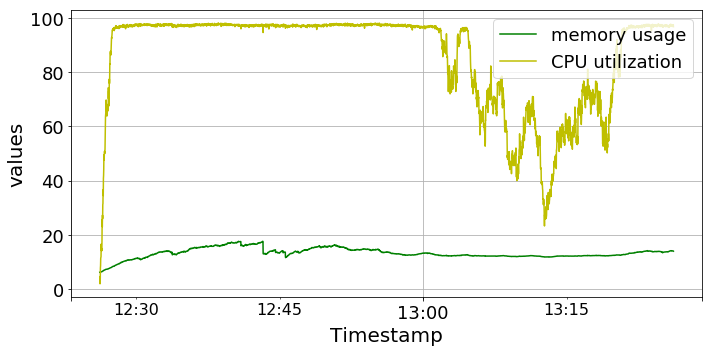

In [27]:
#Time series of memory usage ("%%memused") and CPU utilization ("all_%%usr"), 
#both curves in a single plot. 
import matplotlib.pyplot as plt

timeIndex=pd.to_datetime(X['TimeStamp'],unit='s')
X.index=timeIndex

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

mem_use = X['%%memused'].plot(color='g')
cpu_uti = X['all_%%usr'].plot(color='y')
axes.grid(True)

font_size = 20
plt.xlabel('Timestamp', fontsize=font_size)
plt.ylabel('values', fontsize=font_size)
plt.legend(('memory usage','CPU utilization'), loc = 'upper right', shadow=False, fancybox=True, fontsize=font_size-2)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)
plt.tight_layout()
plt.show()


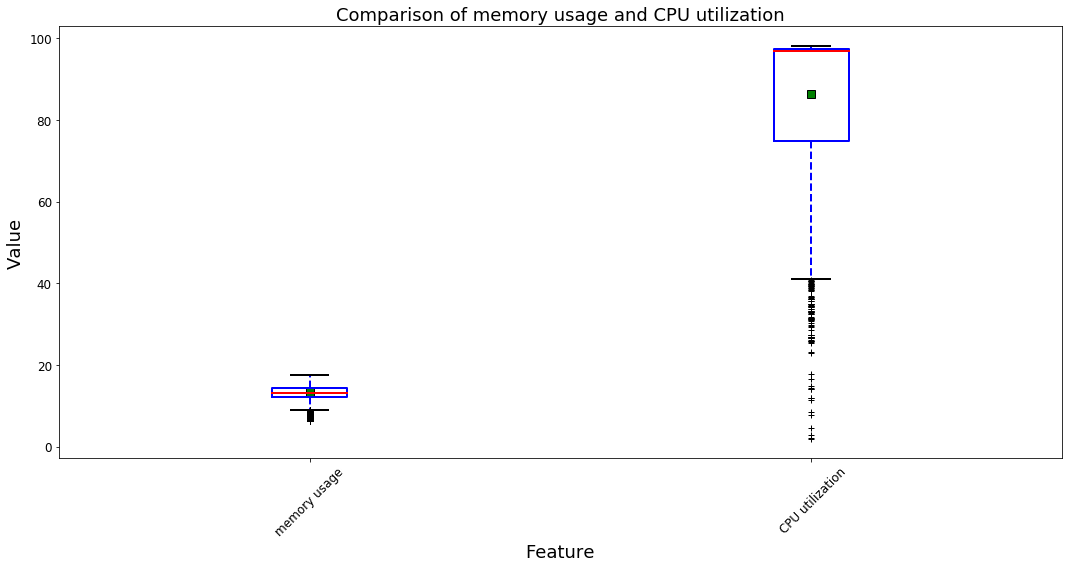

In [28]:
#Box plot of both features in a single plot.

fig, axes = plt.subplots(figsize=(15, 8))
fig.subplots_adjust(left=0.1, right=0.9, top=1, bottom=0.2)
axes.set_title('Comparison of memory usage and CPU utilization',fontsize = 18)
axes.set_xlabel('Feature',fontsize = 18)
axes.set_ylabel('Value',fontsize = 18)


mem_use = X['%%memused']
cpu_uti = X['all_%%usr']
plt.plot(1,mem_use.mean(),'s', markersize=8, markerfacecolor='green', markeredgecolor='black')
plt.plot(2,cpu_uti.mean(),'s', markersize=8, markerfacecolor='green', markeredgecolor='black')
data = [mem_use,cpu_uti]
bp = axes.boxplot(data)


# Change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='blue', linewidth=2)

# Change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='blue', linewidth=2, linestyle='dashed')

# Change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#000000', linewidth=2)

# Change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='red', linewidth=2)

# change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='+', color='blue', alpha=1)

randomDists = ['memory usage', ' CPU utilization']
axes.set_xticklabels(randomDists,
                    rotation=45, fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()





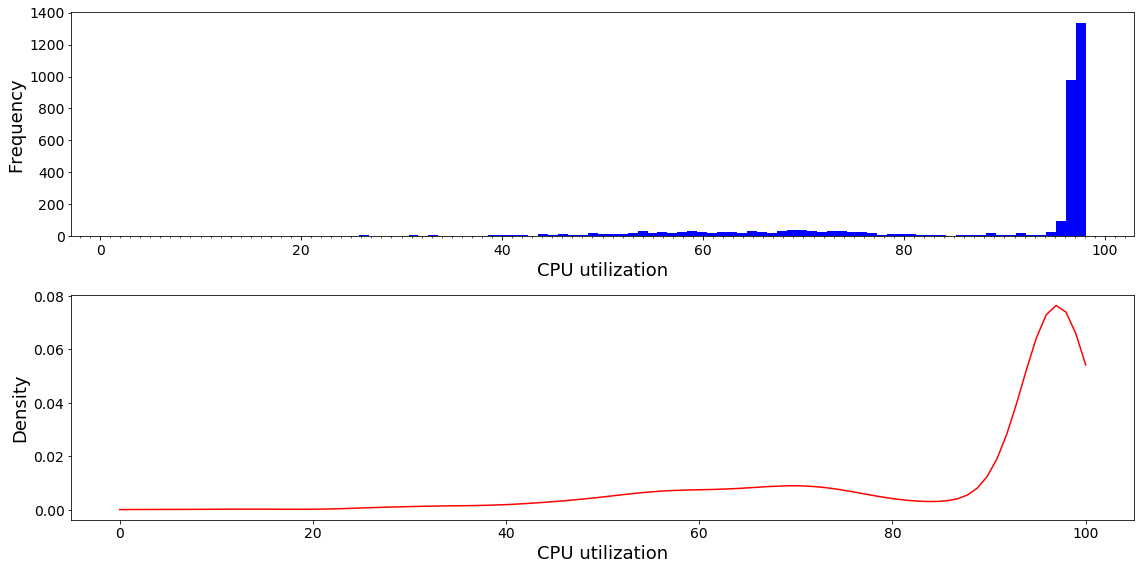

In [29]:
#Density plots of memory usage ("%%memused") and CPU utilization ("all_%%usr"), 
#Histograms of both these features, four plots in all.
import math
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))
xminorLocator= MultipleLocator(1)
# Plots of CPU utilization
mem_bins = math.ceil(X['all_%%usr'].max()-X['all_%%usr'].min()) 
axes[0].xaxis.set_minor_locator(xminorLocator)
axes[0].hist(X['all_%%usr'],bins=mem_bins,color='b')
axes[0].set_xlabel('CPU utilization', fontsize=18)
axes[0].set_ylabel('Frequency', fontsize=18)
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[0].tick_params(axis='both', which='minor', labelsize=14)

X['all_%%usr'].plot.kde(ind=np.linspace(0,100,99),color='r')
axes[1].set_xlabel('CPU utilization', fontsize=18)
axes[1].set_ylabel('Density', fontsize=18)
axes[1].tick_params(axis='both', which='major', labelsize=14)
axes[1].tick_params(axis='both', which='minor', labelsize=14)

plt.tight_layout()
plt.show()


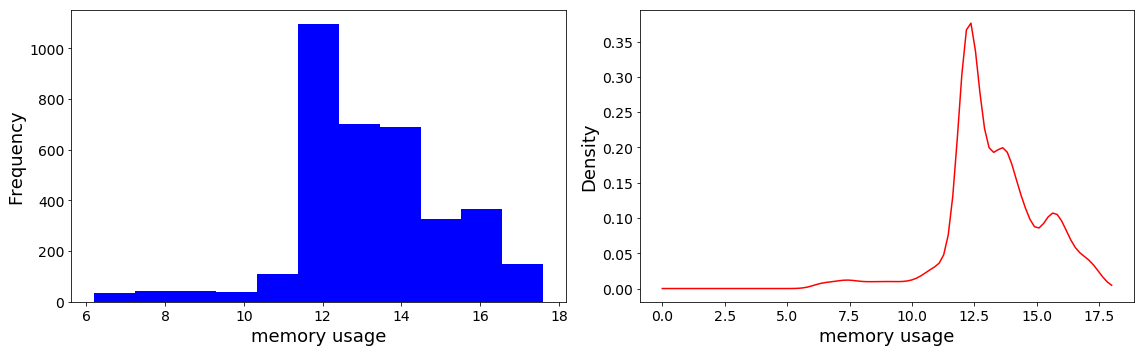

In [30]:
#Density plots of memory usage ("%%memused") and CPU utilization ("all_%%usr"), 
#Histograms of both these features, four plots in all.

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

# Plots of memory usage
mem_bins = int(X['%%memused'].max()-X['%%memused'].min()) 
axes[0].hist(X['%%memused'],bins=mem_bins,color='b')
axes[0].set_xlabel('memory usage', fontsize=18)
axes[0].set_ylabel('Frequency', fontsize=18)
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[0].tick_params(axis='both', which='minor', labelsize=14)

X['%%memused'].plot.kde(ind=np.linspace(0,18,100),color='r')
axes[1].set_xlabel('memory usage', fontsize=18)
axes[1].set_ylabel('Density', fontsize=18)
axes[1].tick_params(axis='both', which='major', labelsize=14)
axes[1].tick_params(axis='both', which='minor', labelsize=14)



plt.tight_layout()
plt.show()


# Task 2. Estimating  Service Metrics from Device Statistics

## 1.1 Evaluate the Accuracy of Service Metric Estimation

Linear regression is a method that assume there is a linear relation between Y (service metrics) and X (device statistics). If X has n features then we can write the linear relation as following:

\begin{equation*}
Y = w_1*x_1+w_2*x_2+...+b
\end{equation*}
where W is the weights vector and b is the bias. The example 1 shows a simple implementation of linear regression. Example 1 shows how we use linear regression to fit a linear model to our dataset. 

In this part you need to change examples in a way that:

1) Use linear regression to train a model M with the training set. Provide coefficients $(w_1, w_2, ...)$ and bias b of your model M.

2) To assess the accuracy of the estimate error of M over test set. We define the estimate error as the Normalized Mean Absolute Error (NMAE) which is defined as $\frac{1}{\bar{y}}(\frac{1}{m}\sum\limits_{i=1}^{m}|y_i-\hat{y}_i|)$, where $\hat{y}_i$ is the model estimation for the measured service metrics $y_i$, and $\bar{y}$ is the average of the observations $y_i$ of the test set, which is size of m=1080 [1]. Note that $\hat{y}_i=M(y_i)$. As a baseline for M, use a $naive$ method which relies on Y values only. For each x in X it predicts a constant value $\bar{y}$ which is the sample mean of samples $y_i$ in training set. Compute $\bar{y}$ for the naive method for the training set and compute the NMAE for the test set.

3) Produce a time series plot that shows both the measurements and the model estimation for M for the Video Frame Rate values in the test set (see example of such a plot in Figure 4(a) of [1]). Show also the prediction of the naive method.

4) Produce a density plot and a histogram for the Video Frame Rate values in the test set. Set the bin size of the histogram to 1 frame. 

5) Produce a density plot for the prediction error $y_i-\hat{y}_i$ in the test set.

6) Based on the above figure and graphs, discuss the accuracy of estimating the Video Frame Rate.

### Solution:

Coefficients: [-1.75e-02  5.83e-03  1.27e-02 -5.19e-06 -7.58e-03  9.02e-02 -2.70e-03
 -9.00e-05  2.30e-01 -1.29e-02  4.55e-04]
Normalized Mean Absolute Error (NMAE) for the test set: 0.099
Mean value of y for the naive method for the training set: 18.9


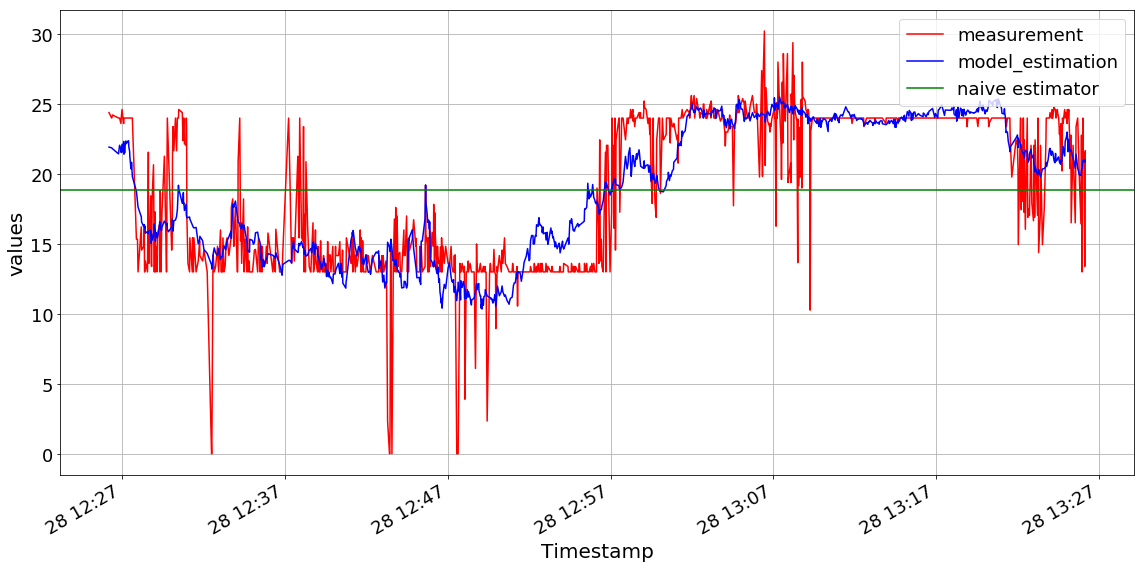

In [31]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error

# Read X,Y traces into pandas DataFrames named X,Y
X = pd.read_csv('X.csv')
Y = pd.read_csv('Y.csv')

#create a single frame with selected columns
X_features = ['plist-sz', 'totsck','ldavg-1','pgfree/s','proc/s',
              'all_%%usr','file-nr','cswch/s','%%memused','runq-sz','TimeStamp']
XY = pd.concat([X[X_features], Y['DispFrames']], axis=1)

# Producing training set and test set
train, test = train_test_split(XY, test_size = 0.3)

# Sort the train and test sets
train = train.sort_index(axis=0)
test = test.sort_index(axis=0)

# Extract X,Y components from test and train sets
X_train = train[X_features]
X_test = test[X_features]
Y_train = train['DispFrames']
Y_test = test['DispFrames']

# Create linear regression object
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

# Print the model coefficients
np.set_printoptions(precision=2)
print("Coefficients:", regr.coef_)

#Calculate the NMAE
Y_predic = regr.predict(X_test)
NMAE = mean_absolute_error(Y_test, Y_predic)/ Y_test.mean()
print("Normalized Mean Absolute Error (NMAE) for the test set: %.3f" % NMAE)
print("Mean value of y for the naive method for the training set: %.1f" % Y_train.mean())


#Draw a time series plot that shows both the measurements and the model estimations in the test set

Y_time = pd.concat([Y_test, Y], axis=1, join='inner')
timeIndex=pd.to_datetime(Y_time['TimeStamp'], unit='s')
Y_test.index=timeIndex
Y_pre_test = pd.Series(Y_predic)
Y_pre_test.index=timeIndex

# Generate a figure with one subplot 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

# Produce the plots for specified features sets
Y_test.plot(color='r')
Y_pre_test.plot(color='b')
plt.axhline(y=Y_train.mean(),color='g')
axes.grid(True)

# Customizing plot (changing font size, labels)
font_size = 20
plt.xlabel('Timestamp', fontsize=font_size)
plt.ylabel('values', fontsize=font_size)
plt.legend(('measurement','model_estimation','naive estimator'), loc = 'upper right', shadow=False, fancybox=True, fontsize=font_size-2)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tight_layout()
plt.show()



[21.92 21.87 21.8  ... 20.89 21.03 20.87]


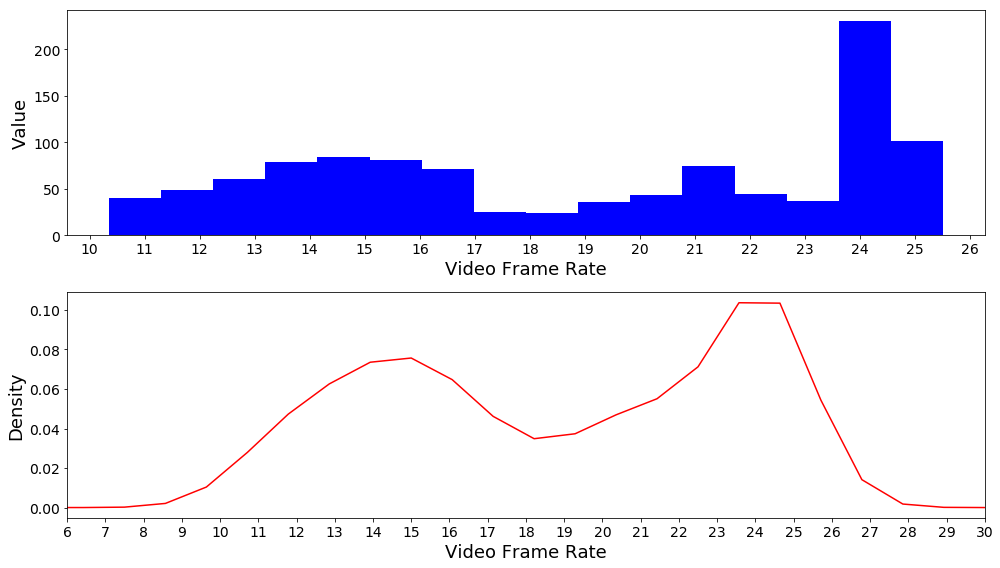

In [32]:
#Produce a density plot and a histogram for the Video Frame Rate values in the test set. 
#Set the bin size of the histogram to 1 frame.
import math
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

print(Y_predic)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))
mem_bins = math.ceil(Y_predic.max()-Y_predic.min())
xmajorLocator = MultipleLocator(1)
axes[0].xaxis.set_major_locator(xmajorLocator)
axes[0].hist(Y_predic,bins=mem_bins,color='b')
axes[0].set_xlabel('Video Frame Rate', fontsize=18)
axes[0].set_ylabel('Value', fontsize=18)
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[0].tick_params(axis='both', which='minor', labelsize=14)

pd.Series(Y_predic).plot.kde(ind=np.linspace(0,30,29),color='r')
axes[1].xaxis.set_major_locator(xmajorLocator)
axes[1].set_xlabel('Video Frame Rate', fontsize=18)
axes[1].set_ylabel('Density', fontsize=18)
axes[1].tick_params(axis='both', which='major', labelsize=14)
axes[1].tick_params(axis='both', which='minor', labelsize=14)

plt.xlim((6,30))
plt.tight_layout()
plt.show()

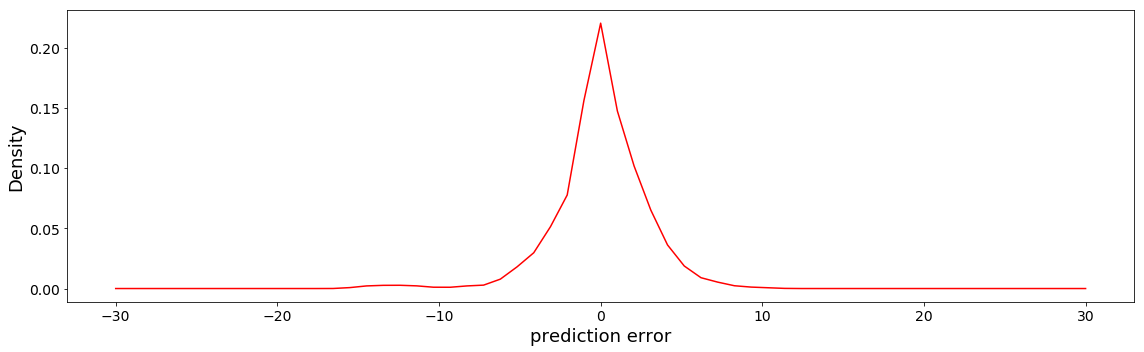

In [33]:
#Produce a density plot for the prediction error  yi−ŷ iyi−y^i  in the test set

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))
pre_errors = pd.Series(Y_test - Y_predic)
#print(pre_errors)
pre_errors.plot.kde(ind=np.linspace(-30,30,59),color='r')
axes.set_xlabel('prediction error', fontsize=18)
axes.set_ylabel('Density', fontsize=18)
axes.tick_params(axis='both', which='major', labelsize=14)
axes.tick_params(axis='both', which='minor', labelsize=14)

plt.tight_layout()
plt.show()

## 1.2 Relation between Estimation Accuracy and size of training set

In this section we attemp to find the relation of the size of training set and accuracy of the model.

a) From the training set with 2520 observation, create six training sets by selecting uniformly at random 50,100,200, 500,1000 and 2520 observations (which is the original set).

b) Train a linear model and compute the NMAE for each model for the original test set with 1080 observations.

c) Perform the above 50 times, so you train models for 50 different subsets of a given size.

d) Produce a plot that shows NMAE for M against the size of the training set. Use error bars or box plots to show the range of the NMAE values for a given set size.

e) Based on the above, discuss the relationship between the accuracy of the model estimation and the training set.

### Solution:

Coefficients of randomly choose 50 observations from the training set with 2520 observation: [-7.09e-02  1.35e-01 -2.71e-02 -1.26e-05 -1.58e-02  1.17e-01 -9.50e-04
 -1.20e-04 -8.39e-01  2.25e-02  1.23e-03]
Normalized Mean Absolute Error (NMAE) for the test set: 0.12919


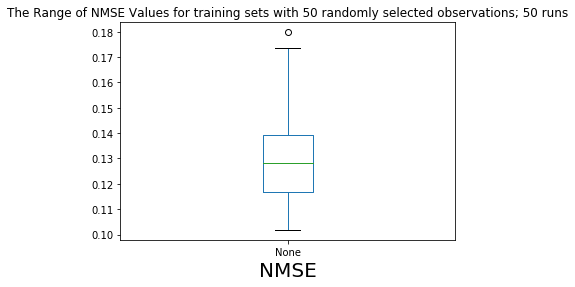

Coefficients of randomly choose 100 observations from the training set with 2520 observation: [-2.81e-02  2.50e-02  2.73e-02 -2.98e-06 -1.49e-02  6.45e-02 -4.61e-03
 -7.59e-05 -3.65e-01  2.53e-02  1.22e-03]
Normalized Mean Absolute Error (NMAE) for the test set: 0.11079


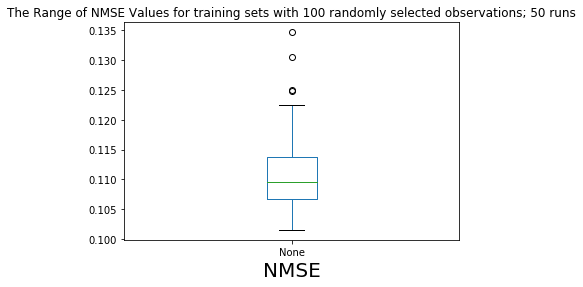

Coefficients of randomly choose 200 observations from the training set with 2520 observation: [-5.12e-02  8.81e-02 -2.06e-02 -6.65e-06 -9.30e-03  1.33e-01  1.30e-03
 -1.60e-04  4.75e-01 -3.15e-02  4.13e-05]
Normalized Mean Absolute Error (NMAE) for the test set: 0.10439


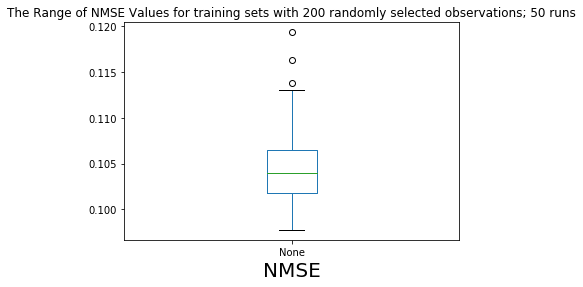

Coefficients of randomly choose 500 observations from the training set with 2520 observation: [-3.56e-02  3.66e-02  2.38e-02 -8.55e-06  1.73e-03  8.80e-02 -5.07e-03
 -8.27e-05  1.67e-01  1.05e-03  4.42e-04]
Normalized Mean Absolute Error (NMAE) for the test set: 0.10091


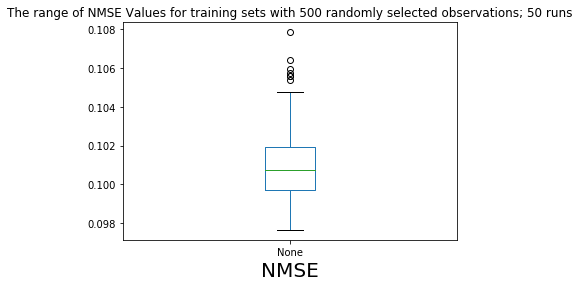

Coefficients of randomly choose 1000 observations from the training set with 2520 observation: [-1.73e-02  1.42e-03  1.73e-02 -3.95e-06 -1.08e-03  9.90e-02 -2.44e-03
 -1.00e-04  3.90e-01 -1.59e-02  2.05e-04]
Normalized Mean Absolute Error (NMAE) for the test set: 0.09967


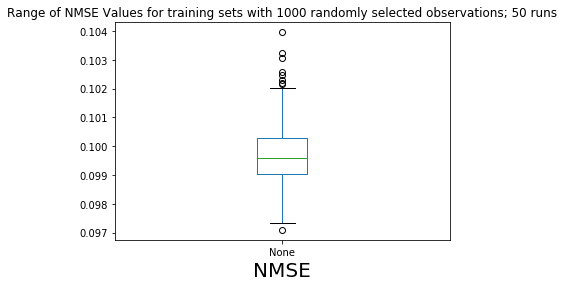

Coefficients of randomly choose 2520 observations from the training set with 2520 observation: [-1.75e-02  5.83e-03  1.27e-02 -5.19e-06 -7.58e-03  9.02e-02 -2.70e-03
 -9.00e-05  2.30e-01 -1.29e-02  4.55e-04]
Normalized Mean Absolute Error (NMAE) for the test set: 0.09887


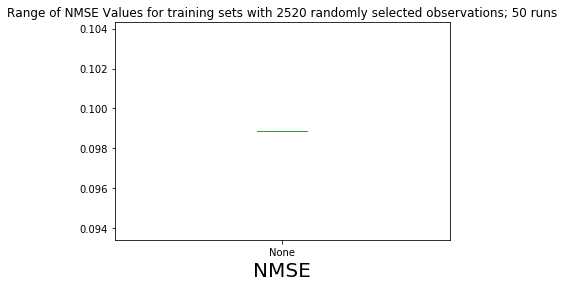

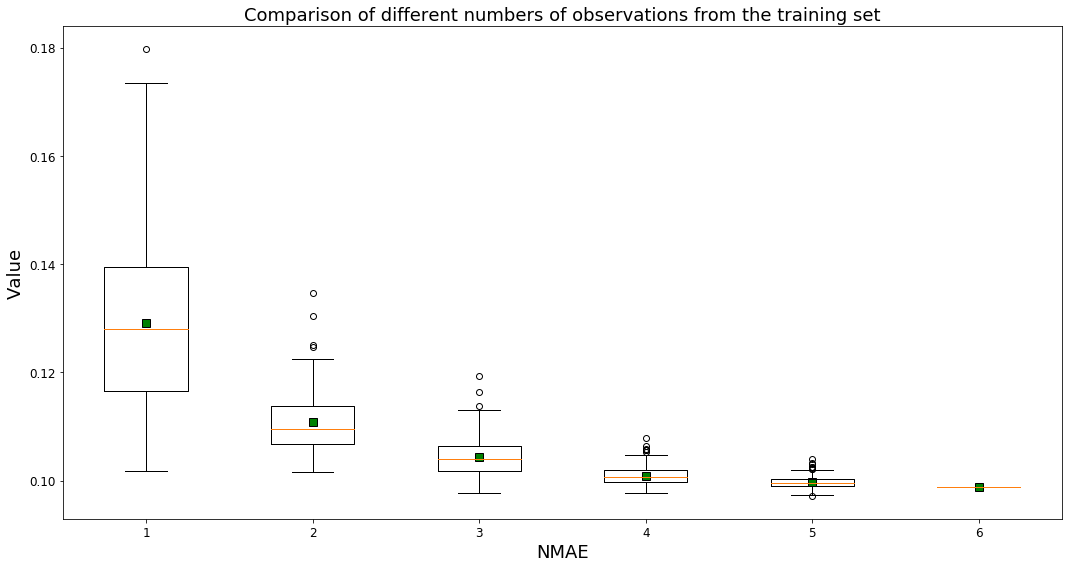

In [34]:
Y_train_df = pd.DataFrame(Y_train)
XY_train = pd.concat([X_train[X_features], Y_train_df['DispFrames']], axis=1)
NMAE1_50 = pd.Series(index=range(0,50))
for i in range(0, 50):
   # Producing training set 50
    train_from_train_set, test_from_train_set = train_test_split(XY_train, test_size = 2470, train_size = 50)
    X_train_50 = train_from_train_set[X_features]
    Y_train_50 = train_from_train_set['DispFrames']
    # Create linear regression object
    regr_50 = linear_model.LinearRegression()
    regr_50.fit(X_train_50, Y_train_50)
    # Compute MSE 
    NMAE1_50[i] = mean_absolute_error(Y_test, regr_50.predict(X_test)) / Y_test.mean()
np.set_printoptions(precision=2)
print("Coefficients of randomly choose 50 observations from the training set with 2520 observation:", regr_50.coef_)
print("Normalized Mean Absolute Error (NMAE) for the test set: %.5f" % NMAE1_50.mean()) 
NMAE1_50.plot.box(title="The Range of NMSE Values for training sets with 50 randomly selected observations; 50 runs")
plt.xlabel('NMSE', fontsize=20)
plt.show()
print("==========================================================================")

NMAE1_100 = pd.Series(index=range(0,100))
for i in range(0, 100):
    # Producing training set 100
    train_from_train_set, test_from_train_set = train_test_split(XY_train, test_size = 2420, train_size = 100)
    X_train_100 = train_from_train_set[X_features]
    Y_train_100 = train_from_train_set['DispFrames']
    # Create linear regression object
    regr_100 = linear_model.LinearRegression()
    regr_100.fit(X_train_100, Y_train_100)
    # Compute MSE 
    NMAE1_100[i] = mean_absolute_error(Y_test, regr_100.predict(X_test)) / Y_test.mean()
# Print the model coefficients
np.set_printoptions(precision=2)
print("Coefficients of randomly choose 100 observations from the training set with 2520 observation:", regr_100.coef_)
print("Normalized Mean Absolute Error (NMAE) for the test set: %.5f" % NMAE1_100.mean())
NMAE1_100.plot.box(title="The Range of NMSE Values for training sets with 100 randomly selected observations; 50 runs")
plt.xlabel('NMSE', fontsize=20)
plt.show()
print("==========================================================================")

NMAE1_200 = pd.Series(index=range(0,200))
for i in range(0, 200):
    # Producing training set 200
    train_from_train_set, test_from_train_set = train_test_split(XY_train, test_size = 2320, train_size = 200)
    X_train_200 = train_from_train_set[X_features]
    Y_train_200 = train_from_train_set['DispFrames']
    # Create linear regression object
    regr_200 = linear_model.LinearRegression()
    regr_200.fit(X_train_200, Y_train_200)
    # Compute MSE 
    NMAE1_200[i] = mean_absolute_error(Y_test, regr_200.predict(X_test)) / Y_test.mean()
# Print the model coefficients
np.set_printoptions(precision=2)
print("Coefficients of randomly choose 200 observations from the training set with 2520 observation:", regr_200.coef_)
print("Normalized Mean Absolute Error (NMAE) for the test set: %.5f" % NMAE1_200.mean())
NMAE1_200.plot.box(title="The Range of NMSE Values for training sets with 200 randomly selected observations; 50 runs")
plt.xlabel('NMSE', fontsize=20)
plt.show()
print("==========================================================================")

NMAE1_500 = pd.Series(index=range(0,500))
for i in range(0, 500):
    # Producing training set 500
    train_from_train_set, test_from_train_set = train_test_split(XY_train, test_size = 2020, train_size = 500)
    X_train_500 = train_from_train_set[X_features]
    Y_train_500 = train_from_train_set['DispFrames']
    # Create linear regression object
    regr_500 = linear_model.LinearRegression()
    regr_500.fit(X_train_500, Y_train_500)
    # Compute MSE 
    NMAE1_500[i] = mean_absolute_error(Y_test, regr_500.predict(X_test)) / Y_test.mean()
# Print the model coefficients
np.set_printoptions(precision=2)
print("Coefficients of randomly choose 500 observations from the training set with 2520 observation:", regr_500.coef_)
print("Normalized Mean Absolute Error (NMAE) for the test set: %.5f" % NMAE1_500.mean())
NMAE1_500.plot.box(title="The range of NMSE Values for training sets with 500 randomly selected observations; 50 runs")
plt.xlabel('NMSE', fontsize=20)
plt.show()
print("==========================================================================")

NMAE1_1000 = pd.Series(index=range(0,1000))
for i in range(0, 1000):
    # Producing training set 1000
    train_from_train_set, test_from_train_set = train_test_split(XY_train, test_size = 1520, train_size = 1000)
    X_train_1000 = train_from_train_set[X_features]
    Y_train_1000 = train_from_train_set['DispFrames']
    # Create linear regression object
    regr_1000 = linear_model.LinearRegression()
    regr_1000.fit(X_train_1000, Y_train_1000)
    # Compute MSE 
    NMAE1_1000[i] = mean_absolute_error(Y_test, regr_1000.predict(X_test)) / Y_test.mean()
# Print the model coefficients
np.set_printoptions(precision=2)
print("Coefficients of randomly choose 1000 observations from the training set with 2520 observation:", regr_1000.coef_)
print("Normalized Mean Absolute Error (NMAE) for the test set: %.5f" % NMAE1_1000.mean())
NMAE1_1000.plot.box(title="Range of NMSE Values for training sets with 1000 randomly selected observations; 50 runs")
plt.xlabel('NMSE', fontsize=20)
plt.show()
print("==========================================================================")

NMAE1_2520 = pd.Series(index=range(0,2520))
for i in range(0, 2520):
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X_train, Y_train)
    #Calculate the NMAE
    NMAE1_2520[i] = mean_absolute_error(Y_test, regr.predict(X_test)) / Y_test.mean()
# Producing training set 2520
np.set_printoptions(precision=2)
print("Coefficients of randomly choose 2520 observations from the training set with 2520 observation:", regr.coef_)
print("Normalized Mean Absolute Error (NMAE) for the test set: %.5f" % NMAE1_2520.mean())
NMAE1_2520.plot.box(title="Range of NMSE Values for training sets with 2520 randomly selected observations; 50 runs")
plt.xlabel('NMSE', fontsize=20)
plt.show()


fig, axes = plt.subplots(figsize=(15, 8))
fig.subplots_adjust(left=0.1, right=0.9, top=1, bottom=0.2)
axes.set_title('Comparison of different numbers of observations from the training set',fontsize = 18)
axes.set_xlabel('NMAE',fontsize = 18)
axes.set_ylabel('Value',fontsize = 18)

plt.plot(1,NMAE1_50.mean(),'s', markersize=8, markerfacecolor='green', markeredgecolor='black')
plt.plot(2,NMAE1_100.mean(),'s', markersize=8, markerfacecolor='green', markeredgecolor='black')
plt.plot(3,NMAE1_200.mean(),'s', markersize=8, markerfacecolor='green', markeredgecolor='black')
plt.plot(4,NMAE1_500.mean(),'s', markersize=8, markerfacecolor='green', markeredgecolor='black')
plt.plot(5,NMAE1_1000.mean(),'s', markersize=8, markerfacecolor='green', markeredgecolor='black')
plt.plot(6,NMAE1_2520.mean(),'s', markersize=8, markerfacecolor='green', markeredgecolor='black')
data = [NMAE1_50,NMAE1_100,NMAE1_200,NMAE1_500,NMAE1_1000,NMAE1_2520]
bp = axes.boxplot(data)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.tight_layout()
plt.show()
